In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
df = pd.read_csv('C:\\Users\\praha\\OneDrive\\Desktop\\kaggle datsets\\student-mat.csv')
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


In [30]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [31]:
df.describe()


,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [32]:
#outlier detection
X = df[['studytime','failures', 'G1', 'G2','freetime','traveltime','Medu','Fedu','age','health','famrel','goout']]
y=df['G3']
def detect_outlier(df):

  flag_outlier = False

  for feature in df:
    column = df[feature]
    mean = np.mean(column)
    std = np.std(column)
    z_scores = (column - mean) / std
    outliers = np.abs(z_scores) > 3

    n_outliers = sum(outliers)
    if n_outliers > 0:
      print("{} has {} outliers".format(column, n_outliers))
      flag_outlier = True

    if flag_outlier==False:
      print("The dataset has no outliers.")
    
    return None
  
detect_outlier(X)


The dataset has no outliers.


In [99]:
z = df[df['G3']<1].index
z1 = df[df['G2']<2].index
z2 = df[df['G1']<1].index
print(y)
df.drop(z,inplace=True)
X.drop(z,inplace=True)
df.drop(z1,inplace=True)
X.drop(z1,inplace=True)
df.drop(z2,inplace=True)
X.drop(z2,inplace=True)
df.head(100)
len(df['G3'])
len(X)


0       6
1       6
2      10
3      15
4      10
       ..
390     9
391    16
392     7
393    10
394     9
Name: G3, Length: 357, dtype: int64


C:\Users\praha\AppData\Local\Temp\ipykernel_35068\142148327.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(z,inplace=True)
C:\Users\praha\AppData\Local\Temp\ipykernel_35068\142148327.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(z1,inplace=True)
C:\Users\praha\AppData\Local\Temp\ipykernel_35068\142148327.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.drop(z2,inplace=True)


357

In [100]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1 = scaler.fit_transform(X)
print(X1)
s_df = pd.DataFrame(X1, columns=X.columns)
print(s_df)
s_df.head()
len(X1)

[[-0.05057821 -0.40504663 -1.93729424 ... -0.39196864  0.05067149
   0.82805631]
 [-0.05057821 -0.40504663 -1.93729424 ... -0.39196864  1.18127916
  -0.09000612]
 [-0.05057821  4.06716925 -1.31922985 ... -0.39196864  0.05067149
  -1.00806855]
 ...
 [-1.25433963  4.06716925 -0.39213328 ... -0.39196864  1.18127916
  -0.09000612]
 [-1.25433963 -0.40504663 -0.08310109 ...  1.03591713  0.05067149
  -1.92613098]
 [-1.25433963 -0.40504663 -1.01019766 ...  1.03591713 -1.07993617
  -0.09000612]]
     studytime  failures        G1        G2  freetime  traveltime      Medu  \
0    -0.050578 -0.405047 -1.937294 -1.705034 -0.244014    0.829976  1.102535   
1    -0.050578 -0.405047 -1.937294 -2.023224 -0.244014   -0.629637 -1.643547   
2    -0.050578  4.067169 -1.319230 -1.068655 -0.244014   -0.629637 -1.643547   
3     1.153183 -0.405047  1.153028  0.840485 -1.233933   -0.629637  1.102535   
4    -0.050578 -0.405047 -1.628262 -0.432275 -0.244014   -0.629637  0.187175   
..         ...       ...    

357

In [101]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant  
 
# the indept variables
  
# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = s_df.columns
  
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(s_df.values, i)
                          for i in range(len(s_df.columns))]
  
print(vif_data)

       feature       VIF
0    studytime  1.083570
1     failures  1.277539
2           G1  5.978070
3           G2  5.969454
4     freetime  1.164666
5   traveltime  1.066751
6         Medu  1.657568
7         Fedu  1.680094
8          age  1.227192
9       health  1.036455
10      famrel  1.042591
11       goout  1.160563


In [37]:
df.isnull().sum()


school        0
sex           0
age           0
address       0
famsize       0
Pstatus       0
Medu          0
Fedu          0
Mjob          0
Fjob          0
reason        0
guardian      0
traveltime    0
studytime     0
failures      0
schoolsup     0
famsup        0
paid          0
activities    0
nursery       0
higher        0
internet      0
romantic      0
famrel        0
freetime      0
goout         0
Dalc          0
Walc          0
health        0
absences      0
G1            0
G2            0
G3            0
dtype: int64

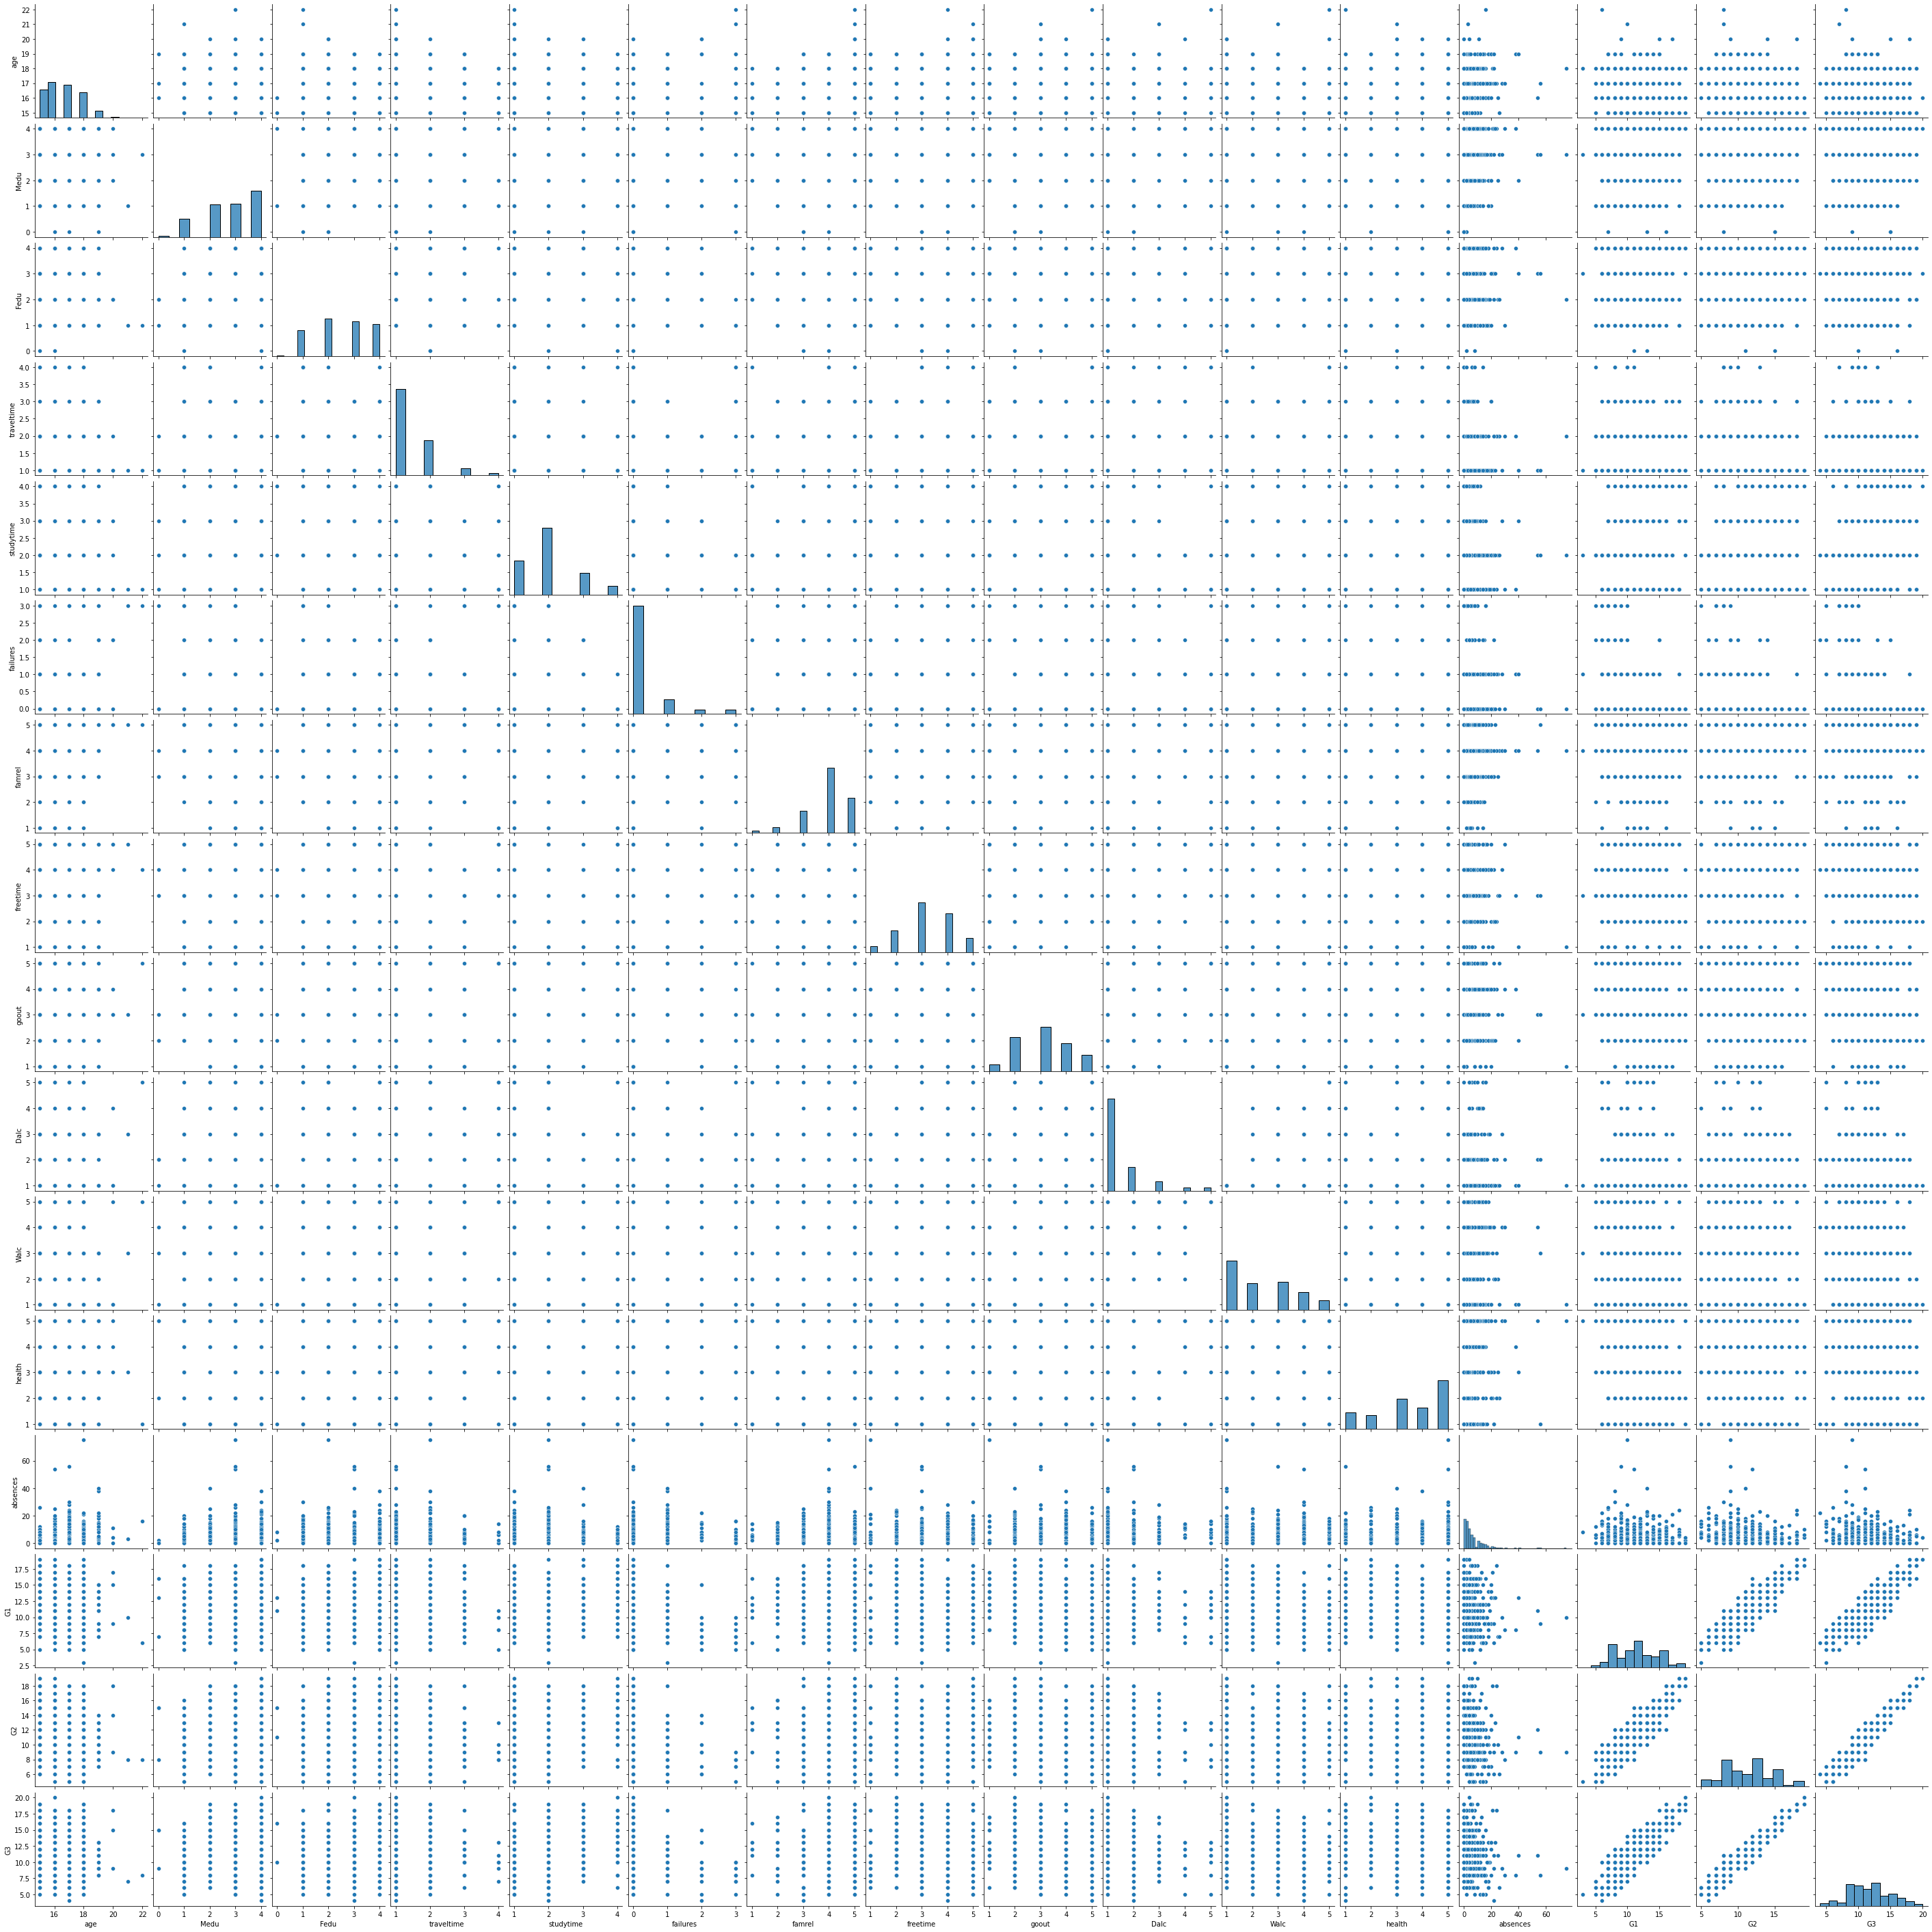

In [14]:
sns.pairplot(df)

In [38]:
correlation = s_df.corr()
correlation


,studytime,failures,G1,G2,freetime,traveltime,Medu,Fedu,age,health,famrel,goout
studytime,1.000000,-0.173563,0.160612,0.135880,-0.143198,-0.100909,0.064944,-0.009175,-0.004140,-0.075616,0.039731,-0.063904
failures,-0.173563,1.000000,-0.354718,-0.355896,0.091987,0.092239,-0.236680,-0.250408,0.243665,0.065827,-0.044337,0.124561
G1,0.160612,-0.354718,1.000000,0.852118,0.012613,-0.093040,0.205341,0.190270,-0.064081,-0.073172,0.022168,-0.149104
G2,0.135880,-0.355896,0.852118,1.000000,-0.013777,-0.153198,0.215527,0.164893,-0.143474,-0.097720,-0.018281,-0.162250
freetime,-0.143198,0.091987,0.012613,-0.013777,1.000000,-0.017025,0.030891,-0.012846,0.016434,0.075733,0.150701,0.285019
traveltime,-0.100909,0.092239,-0.093040,-0.153198,-0.017025,1.000000,-0.171639,-0.158194,0.070641,0.007501,-0.016808,0.028540
Medu,0.064944,-0.236680,0.205341,0.215527,0.030891,-0.171639,1.000000,0.623455,-0.163658,-0.046878,-0.003914,0.064094
Fedu,-0.009175,-0.250408,0.190270,0.164893,-0.012846,-0.158194,0.623455,1.000000,-0.163438,0.014742,-0.001370,0.043105
age,-0.004140,0.243665,-0.064081,-0.143474,0.016434,0.070641,-0.163658,-0.163438,1.000000,-0.062187,0.053940,0.126964
health,-0.075616,0.065827,-0.073172,-0.097720,0.075733,0.007501,-0.046878,0.014742,-0.062187,1.000000,0.094056,-0.009577


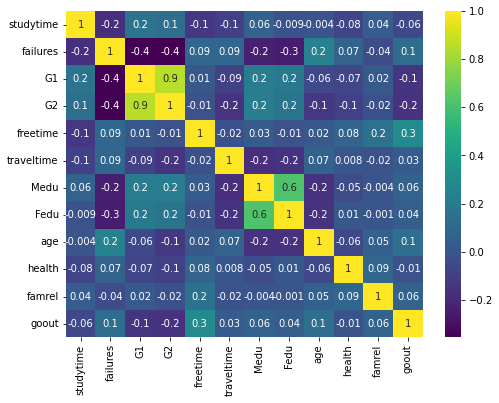

In [39]:
# Having a look at the correlation matrix

fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(s_df.corr(), annot=True, fmt='.1g', cmap="viridis",);


C:\Users\praha\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='failures'>

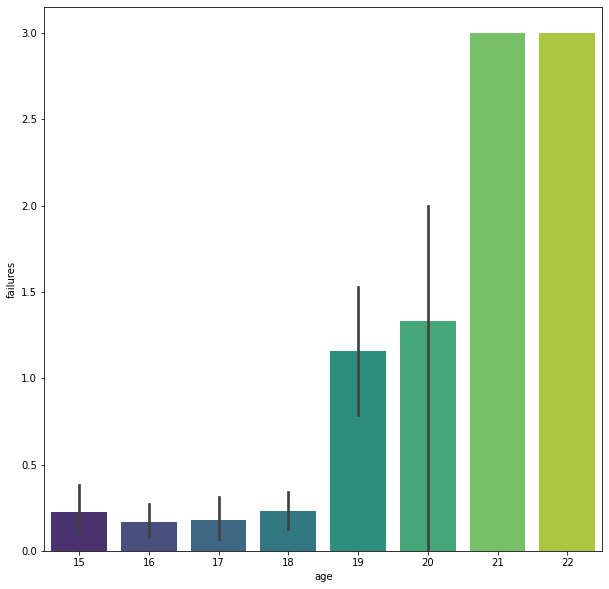

In [40]:
#graph of age vs failures
plt.figure(figsize=(10,10))
sns.barplot(df['age'],df['failures'],palette='viridis')


In [78]:
len(y)



357

In [102]:
from sklearn.model_selection import train_test_split
#independent Variable
X =s_df[['studytime','failures', 'G1', 'G2','freetime','traveltime','Medu','Fedu','age','health','famrel','goout']]


#dependent variable
y =(df['G3'])


#Train Test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state= 42)


In [103]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(normalize = True)

lr.fit(X_train,y_train)

our_pred = lr.predict(X_test)

print(our_pred)


[12.40129028 18.07841605 10.86109491  9.2261152  15.27390785  7.26294263
 14.16304832 14.81372119  8.82825221  7.29160434  6.15446149  5.28515511
 11.50518548 10.35094503 13.07758308 10.20611831 11.10126561 13.26809804
 12.82753894 15.67340482 10.43111813 11.57452429  9.13763437 10.27546241
 16.10458014 12.21691158  8.65619313 12.95439818  8.34047201 12.33691645
 11.22417572 15.01636976 10.24894817 10.52916334 18.8505768  13.64201198
 15.01414452 12.23908099 12.72048863  7.1325802  10.12914631 10.91106334
 13.60645054 12.61260425  9.26015857 10.29409486  9.33383411 15.14044319
  8.35823561 12.73186725 17.15422085 12.34734194 13.55216355  8.36460216
  6.3728836   6.69887413 14.08988108 13.04900145 11.26403642 14.31854123
  8.95783661 11.63996077  8.96668536 11.36454239  6.17342382 10.15148307
 14.18820543 15.2071943  11.43961645 10.81740814  9.01090095  6.80332349
 12.2463409  10.64030213 11.55936726  9.07180565  8.07846809  9.09144049
 13.9596231  12.62566957 16.19593986  5.72669553 14

C:\Users\praha\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


C:\Users\praha\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\praha\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='G3'>

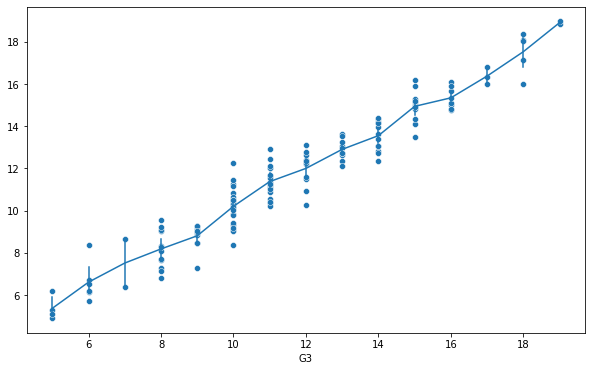

In [104]:
plt.figure(figsize= (10,6))
sns.lineplot(y_test,our_pred, err_style="bars")
sns.scatterplot(y_test, our_pred)


0.0076165619021722275


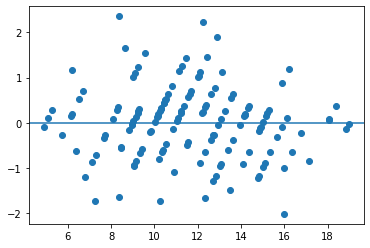

In [105]:
#checking for homoscedasticity of errors
import matplotlib.pyplot as plt
from statistics import mean
residuals = our_pred-y_test # true minus predicted
rem=mean(residuals)
print(rem)
plt.scatter(x=our_pred, y=residuals)
plt.axhline(0)
plt.show()



In [106]:
from scipy.stats import kstest

#perform Kolmogorov-Smirnov test
kstest(residuals, 'norm')


KstestResult(statistic=0.10212753024142385, pvalue=0.09437483547108727)

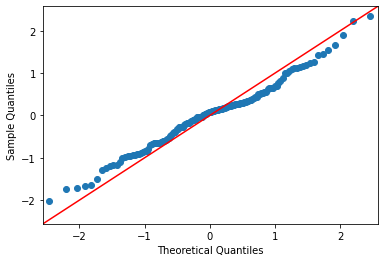

In [107]:
from statsmodels.graphics.gofplots import qqplot
qqplot(residuals, line='45')
plt.show()

In [108]:
from statsmodels.stats.stattools import durbin_watson
gfg = durbin_watson(residuals)
print(gfg)


1.9706036607498416


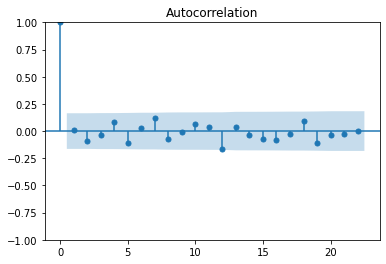

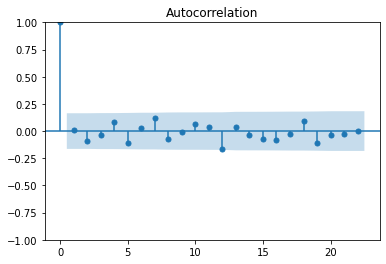

In [98]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(residuals)


In [66]:
from statsmodels.stats.diagnostic import het_white
import statsmodels.api as sm
#fit regression model
X=sm.add_constant(X)
model = sm.OLS(list(y), X).fit()
# White's test
white_test = het_white(model.resid,  model.model.exog)

#define labels to use for output of White's test
labels = ['Test Statistic', 'Test Statistic p-value', 'F-Statistic', 'F-Test p-value']

#print results of White's test
print(dict(zip(labels, white_test)))


{'Test Statistic': 99.74993204560901, 'Test Statistic p-value': 0.22623572780724976, 'F-Statistic': 1.1460306625689922, 'F-Test p-value': 0.20432539174625036}


C:\Users\praha\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


MSE 0.7288986001996312
R2: 0.9254648184007968


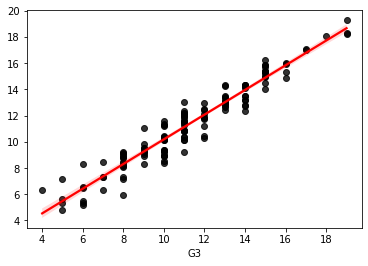

In [67]:
sns.regplot(y_test,our_pred,scatter_kws={"color": "black"}, line_kws={"color": "red"})

from sklearn import metrics
from sklearn.metrics import r2_score

print('MSE', metrics.mean_squared_error(y_test,our_pred))
print('R2:', r2_score(y_test , our_pred))


In [68]:
#check accuracy of our model on the test data
lr.score(X_test, y_test)
#display regression coefficients and R-squared value of model
print(lr.intercept_, lr.coef_)

0.7587491607000718 [-0.01626932  0.01762945  0.12952431  0.87001994  0.02392671  0.06367607
  0.04600225 -0.04439666 -0.03548876 -0.08575549  0.0922974  -0.05017204]
